# FS20 Fill-Up Question wer/Wahrscheinlichkeitsrechnen (probability calculation)
----
<span style='color:red'>Add Theme Title</span>

Autor: Roman Studer, roman.studer1@students.fhnw.ch

<img src="./data/bayes.jpg"
     alt="A blue neon sign showing the simple statement of Bayes’ theorem at the offices of HP Autonomy"/>
[Image source](https://en.wikipedia.org/wiki/Bayes%27_theorem#/media/File:Bayes'_Theorem_MMB_01.jpg)

# Introduction
<span style='color:red'>Add overview, basic idea and plan to execute said idea</span>


In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

In [2]:
# read dataset
data = pd.read_csv('data/emails.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [3]:
data.iloc[2][0] # spam e-mail example

'Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman'

## Task definition
**Spam detection using a Bayesian filter.**
"Naive Bayes classifiers are a popular statistical technique of e-mail filtering. They typically use bag of words features to identify spam e-mail, an approach commonly used in text classification."
[(taken from wikipedia)](https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering)
The goal is to create a filter that flags spam e-mail in a testset reasonably well. The 

## Data
Data set with labeled spam emails as well as harmless emails which allows a train/test split.  
Example: https://archive.ics.uci.edu/ml/datasets/Spambase  

## Delivery
The following deliverables have been defined and will be included in the submitted work:
- An adaptive spam classifier adapted to the dataset in a Jupyter notebook  
- Including code documentation. 
----

# Definition of a naive bayes classifier 

## Description
<span style='color:red'>Better description</span>

The probability that an email is a spam message if a word $w$ occurs is defined by the probability that word $w$ is in a spam message $s$ multiplied by the general probability that the email is a spam message $s$. This gets divided by the same value which gets added to the probability that word $w$ is not in a spam message $s$.

$$
P(s \vert w) = \frac{P(w \vert s)P(s)}{P(w \vert s)P(s)+P(w \vert \lnot s)P(\lnot s)}
$$

To decide if an email is spam, we need to get a single probability $p$ for the whole email and not just for the single words ($p_1$ to $p_n$). Because the spam filter uses a bayesian approach we can achieve this by multiplying the probabilites for every word together and dividing by the combined probability of every word for being in a spam message plus the combined probability of a every word for _not_ beeing in a spam message. The formula to achieve this looks as follows: 

$$
P = \frac{p_1 p_2 ... p_n}{p_1 p_2 ... p_n + (1- p_1)(1-p_2)...(1-p_n)}
$$

## Procedure
<span style='color:red'>Define necessary steps and plan pipeline</span>


----
# Building a naive bayes spam classifier 
<span style='color:red'>Better description + Add Pipeline</span>


----

## Removal of filler words and special characters

In [4]:
# filler words, source = https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
en = ['subject:','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
      'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 
      'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
      'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
      'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
      'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
      'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
      'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 
      'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
      'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 
      'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", '~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', 
      '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/']

In [5]:
def rm_filler(text):
    '''
    Removes (rm) all the filler words of the english language in a str including special characters
    
    :param text: string of words 
    :return text_new: string without filler words
    '''
    if type(text) != str:
        raise TypeError(f"Function only accepts str. {data.type} given")
    
    words = text.lower().split()
    words = [word for word in words if word not in en]
    
    text_new = ' '.join(words)
    
    return text_new

In [6]:
data['text'] = data.text.apply(rm_filler)
data.head()

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,4 color printing special request additional in...,1
4,money get software cds software compatibility ...,1


##  Train/Test split

The dataset contains in total 5728 Emails with the label $0$ for ham or $1$ for spam. Over a quarter of the E-Mails are spam (1368 out of 5728). The next step is to split the dataset into a test and train set. The testset size is set for 0.2 or 20%.

In [7]:
print(f'Shape of Dataset: {data.shape}')
print('Number of ham (0) and spam (1) emails:')
data['spam'].value_counts()

Shape of Dataset: (5728, 2)
Number of ham (0) and spam (1) emails:


0    4360
1    1368
Name: spam, dtype: int64

In [8]:
# split data into test and training set
train, test = train_test_split(data, test_size=0.3, random_state=42)
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (4009, 2)
Test shape: (1719, 2)


In [9]:
train = train.reset_index()

----
## Probability of an email beeing spam or ham
<span style='color:red'>Inset part about bias in spam probability. Add posibility to set p(s) and p(h) to 0.5 to avoid said bias.</span>


Now that we have the set split into a train and test set we can calculate the Probability of an E-Mail being spam or ham. This is quite simple. We simply take the number of spam/ham emails $\text{n_spam}$ or $\text{n_ham}$ and divide them by the total number of emails $\text{n_emails}$.

$$
P(\text{s}) = \frac{\text{n_spam}}{\text{n_emails}} = 0.24
$$

$$
P(\text{h}) = \frac{\text{n_ham}}{\text{n_emails}} = 0.76
$$

In [10]:
p_spam = len(train.loc[train['spam']==1])/len(train) # length of dataset with spam == 1 divided by length of the whole dataset
p_ham = len(train.loc[train['spam']==0])/len(train) # length of dataset with spam == 0 divided by length of the whole dataset
print(f'Probability of an email being spam: {np.round(p_spam, 2)}')
print(f'Probability of an email being ham: {np.round(p_ham, 2)}')

# and to be save a sanity check: p_spam + p_ham should equal 1
print(f'Combined probability: {p_spam + p_ham}')

Probability of an email being spam: 0.23
Probability of an email being ham: 0.77
Combined probability: 1.0


In [11]:
p_spam = 0.5
p_ham = 0.5

This of course also gives us the probability of an email _not_ beeing spam or ham. This is calculated by subtracting the probability from 1, $P(\lnot s) = 1 - P(s)$

----

## Probability for a word to be in a spam email or in a ham email
The probability that a word is found in a spam email ($P(w \vert s)$) is defined by the number of occurances of the word in spam mails divided by the total  number of  spam emails. The same goes for the probability that a word is in a ham email ($P(w \vert \lnot s)$). This approach does not take into account if a word is in an email multiple times or in what relation the words are to eachother. This means that context has no effect. Sentences like "FREE! FREE! stuff", which obviously indicate spam, are not interpreted as such but instead get viewed as a unique word count with the words "free" and "stuff".

$$
P(w \vert s) = \frac{\text{number of spam emails containing} \: w}{\text{total number of spam emails}}
$$

$$
P(w \vert \lnot s) = \frac{\text{number of ham emails containing} \: w}{\text{total number of ham emails}}
$$

To do this effectively we can create a dictionary containing all the words (except filler words) of the email in the train set and precalculate the probability of a word being in a spam mail or ham mail.

In [12]:
def p_word(df, mode=0):
    """
    Creates a dictionary for every word in spam/ham emails as a key with the probability of it being in a spam/ham mail as the value.
    :param df: dataframe with two columns: text and label
    :param mode: defines if the return has words in spam or ham mails (accepts 'spam' and 'ham')
    :return dictionary with key='word' and value='probability'
    """
    
    df = df[df['spam'] == mode] # get spam or ham emails
    
    # get list of unique words
    unique = list(df['text'].str.split(' ', expand=True).stack().unique())
        
    # convert list to dict with initial value
    dict_unique = {i : 0 for i in unique}
    
    t_mail = len(df)
    
    for row in df.iterrows():
        text = row[1][1]
        # get list of words 
        words = list(set(text.split())) # convert list to set to get unique values
        # increment value in dict by one for word in words
        for word in words:
            dict_unique[word] += 1
            
    # calculate probability of email being spam given a word:
    t_mail = len(df) # number of emails in df
    dict_prob = {k: (v / t_mail) for k, v in dict_unique.items()}

    return dict_prob

In [13]:
ham = p_word(train, mode=0)
spam = p_word(train, mode=1)

## Calculate the "spam" probability for every e-mail

In [14]:
def p_mail(df, words):
    """
    Calculate the total probability of an incomming e-mail being spam
    """

In [15]:
def p_total(text):
    
    words = list(set(text.split()))
    p_list = []
    for word in words:
        if word in spam.keys():
            numerator = spam[word] * p_spam
            p_word_ham = 1 - spam[word]
        elif word in ham.keys():
            numerator = (1 - ham[word]) * p_spam
            p_word_ham = ham[word]

            denominator = numerator + (p_word_ham * p_ham)
            p = numerator/denominator
            p_list.append(p)
    total_p  = np.prod(p_list)
    
    return total_p

In [16]:
train['prob'] = train.text.apply(p_total)

In [17]:
train.iloc[2][1]

'lng meeting hello lng meeting held morning changed tomorrow wednesday 17 th 11 00 ebl 938 thanks shirley 3 5290'

In [18]:
test['prob'] = test.text.apply(p_total)

C:\Users\Roman Studer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
test.head()

,text,spam,prob,class
4445,energy derivatives conference may 29 toronto g...,0,0.125854,0
4118,financial maths course part 2 vince case draft...,0,0.989315,0
3893,bullet points please respond hi vince thanks b...,0,0.221825,0
4210,enron default swaps darrell sending 2 technica...,0,0.211187,0
5603,power question steve elena chilkina give histo...,0,0.309761,0


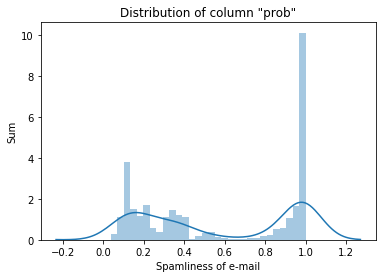

In [110]:
fig = sns.distplot(test.prob, bins=30)
fig.set(title= 'Distribution of column "prob"', xlabel='Spamliness of e-mail', ylabel='Sum')
plt.show()

<span style='color:red'>Add threshold parameter + try gridsearch for best parameter. Lowest diffrence to label</span>

## Classification with threshold and parameter search

In [20]:
def classification(val, threshold):
    """
    Classifies data into binary value, 0 for ham and 1 for spam
    :param val: Value which should be classified
    :param theshold: Threshold for binary classification
    :return val: binary value
    """
    if val >= threshold:
        val = 1 
    else:
        val = 0
    return val

In [133]:
# apply classification on dataset
param = {}
spam = sum(test[test['spam']==1]['spam'])
for i in np.arange(0.5,1.01,0.001):
    test['class'] = test.prob.apply(classification, threshold = i)

    # sensitivity (true positive / real positive)
    sensitivity = sum(test[test['spam']==1]['class'])/sum(test[test['spam']==1]['spam']) # true positive rate
    
    # specificity (true negative / real negative)
    specificity = sum(test[test['spam']==0]['class']==0)/sum(test[test['spam']==0]['spam']==0) # true negative rate 
    
    # accuracy ((true positive + true negative)/(real positive + real negative))
    accuracy = (sum(test[test['spam']==0]['class']==0)+sum(test[test['spam']==1]['class']))/(sum(test[test['spam']==1]['spam'])+sum(test[test['spam']==0]['spam']))
    
    
    param[i] = (sensitivity,specificity,accuracy)

C:\Users\Roman Studer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [137]:
param

{0.5: (1.0, 0.6776212832550861, 2.963718820861678),
 0.501: (1.0, 0.6776212832550861, 2.963718820861678),
 0.502: (1.0, 0.6776212832550861, 2.963718820861678),
 0.503: (1.0, 0.6784037558685446, 2.9659863945578233),
 0.504: (1.0, 0.6791862284820032, 2.9682539682539684),
 0.505: (1.0, 0.6815336463223787, 2.9750566893424035),
 0.506: (1.0, 0.6815336463223787, 2.9750566893424035),
 0.507: (1.0, 0.6815336463223787, 2.9750566893424035),
 0.508: (1.0, 0.6815336463223787, 2.9750566893424035),
 0.509: (1.0, 0.6815336463223787, 2.9750566893424035),
 0.51: (1.0, 0.6823161189358372, 2.9773242630385486),
 0.511: (1.0, 0.6823161189358372, 2.9773242630385486),
 0.512: (1.0, 0.6823161189358372, 2.9773242630385486),
 0.513: (1.0, 0.6838810641627543, 2.981859410430839),
 0.514: (1.0, 0.6838810641627543, 2.981859410430839),
 0.515: (1.0, 0.6846635367762128, 2.984126984126984),
 0.516: (1.0, 0.6854460093896714, 2.9863945578231292),
 0.517: (1.0, 0.6854460093896714, 2.9863945578231292),
 0.518: (1.0, 0.685

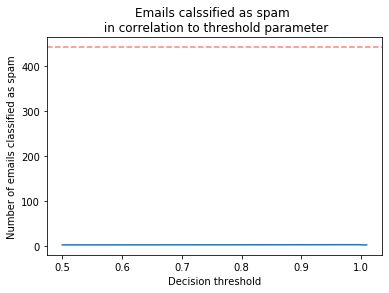

In [136]:
fig = sns.lineplot(list(param.keys()),[a_tuple[] for a_tuple in list(param.values())])
fig.set(title= 'Emails calssified as spam \n in correlation to threshold parameter', xlabel='Decision threshold', ylabel='Number of emails classified as spam')
fig.axhline(spam, color='red', linestyle='--', alpha=0.5)
plt.show()

In [24]:
test.spam.value_counts()

0    1278
1     441
Name: spam, dtype: int64

In [25]:
test['class'].value_counts()

0    1008
1     711
Name: class, dtype: int64

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

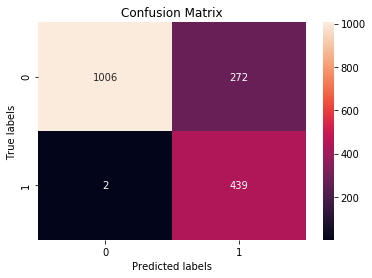

In [26]:
# confusion matrix
cm = confusion_matrix(test.spam, test['class'])
ax= plt.subplot()
sns.heatmap(cm, annot = True, fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

----
# Results

<span style='color:red'>Describe results</span>


## Evalutation

<span style='color:red'>Add confustion matrix</span>
https://stats.stackexchange.com/questions/322927/the-purpose-of-threshold-in-naive-bayes-algorithm

----
# Discussion


----
# Sources

----
# Glossary